### 1 ISL Exercise 8.4.3 (10pts)

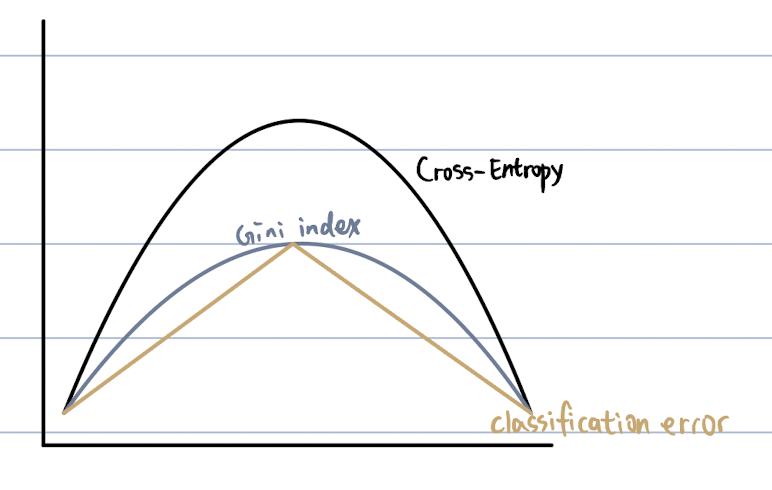

### 2 ISL Exercise 8.4.4 (10pts)

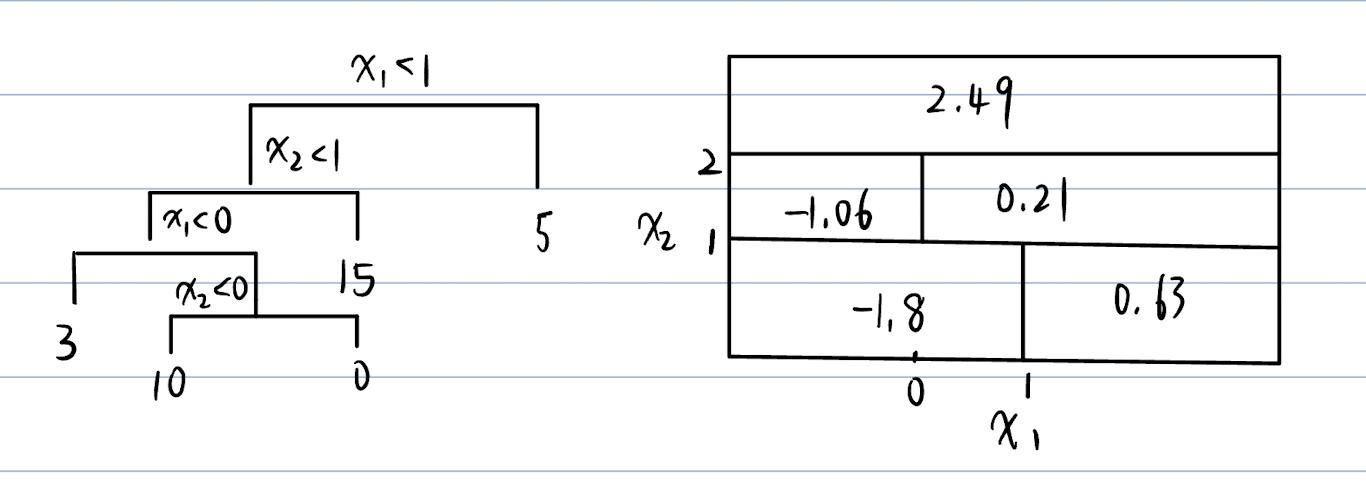

### 3 ISL Exercise 8.4.5 (10pts)

For majority vote, the final classification will be the class Red, as in 6 out of 10 cases, P(Class is Red|X) > P(Class is Green|X). For average method, the average of P(Class is Red|X) = 0.45. So the final classification is Green.

### 4 ISL Lab 8.3. Boston data set (30pts)

In [6]:
import pandas as pd
import io
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [7]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

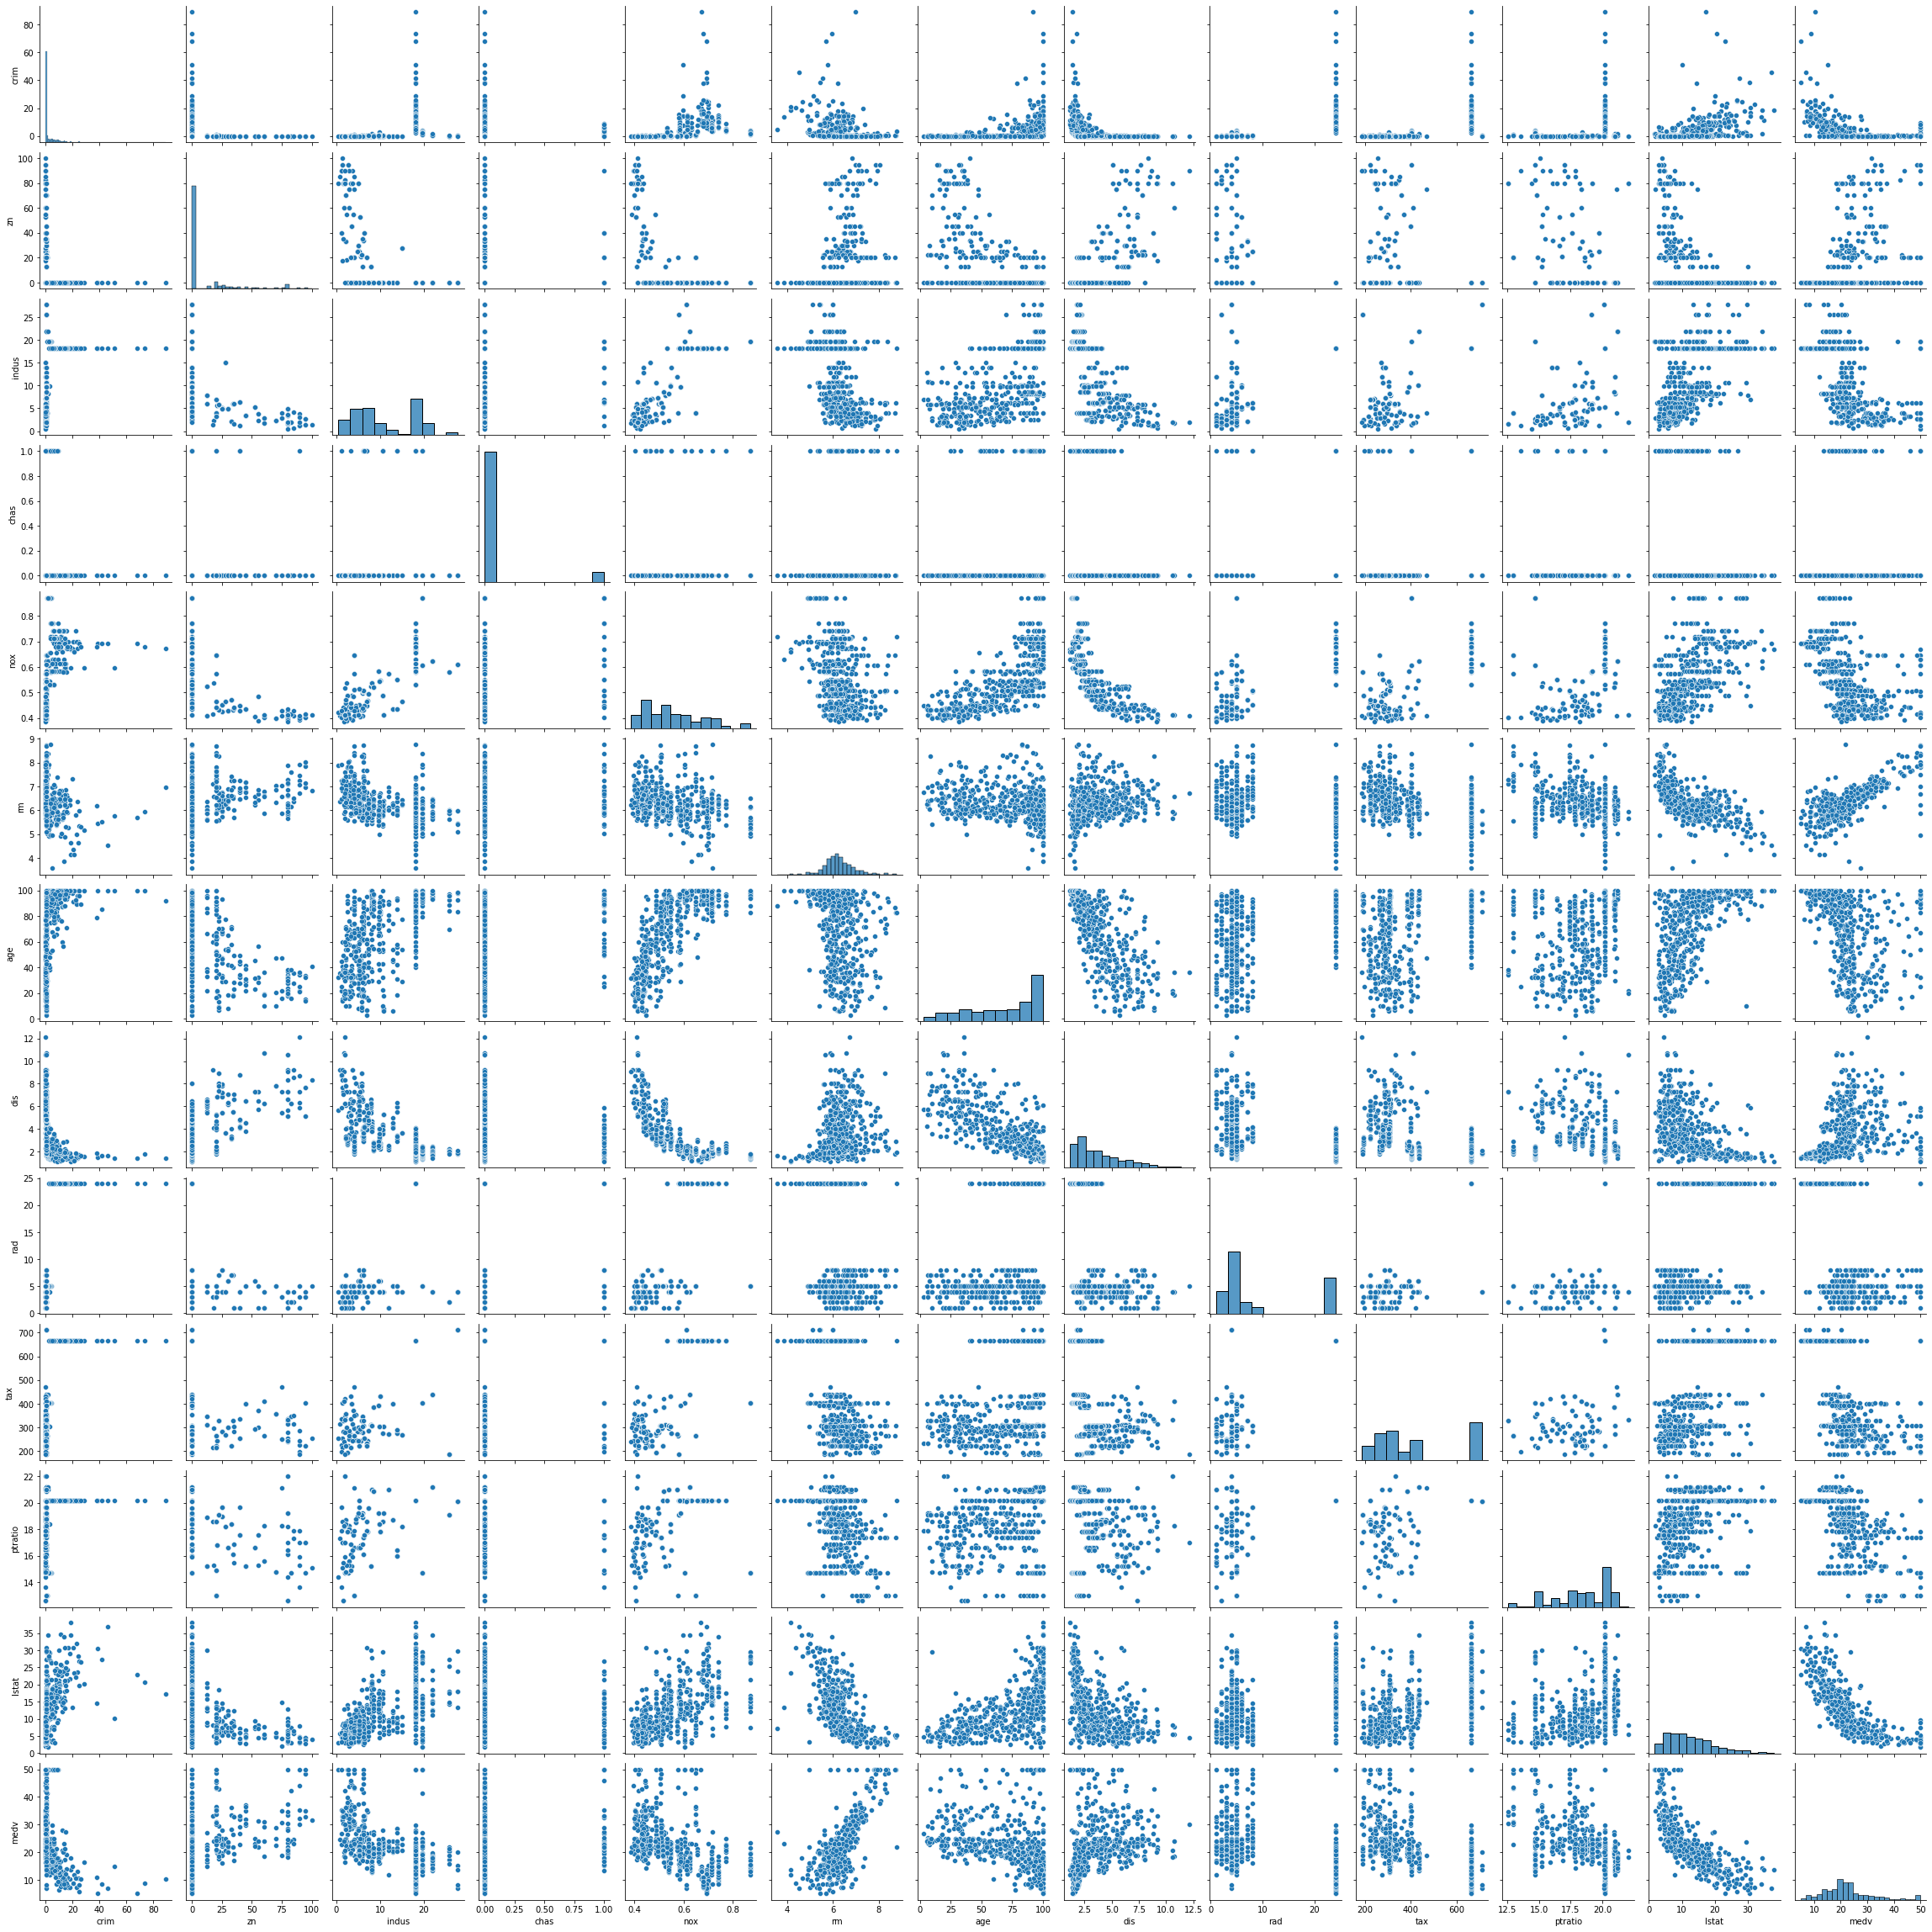

In [8]:
plt.figure()
sns.pairplot(data = data);
plt.show()

In [9]:
data.dropna(inplace = True)
data.shape

(506, 13)

In [10]:
# regression tree
from sklearn.model_selection import train_test_split

data_other, data_test = train_test_split(
  data, 
  train_size = 0.5,
  random_state = 425, # seed
  )
data_test.shape

(253, 13)

In [11]:
data_other.shape

(253, 13)

In [14]:
features = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat']
# Non-test X and y
X_other = data_other[features]
y_other = data_other['medv']
# Test X and y
X_test = data_test[features]
y_test = data_test['medv']

In [15]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

regtree_mod = DecisionTreeRegressor(random_state = 425)

<Figure size 432x288 with 0 Axes>

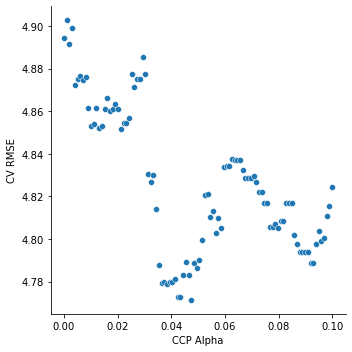

In [16]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", regtree_mod)
  ])

# Tune hyper-parameter(s)
ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.1, num = 100)
tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }

from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

# Fit CV
search.fit(X_other, y_other)

cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "rmse": -search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "ccp_alpha",
  y = "rmse"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV RMSE"
);
plt.show()

In [17]:
-search.best_score_

4.771449755814558

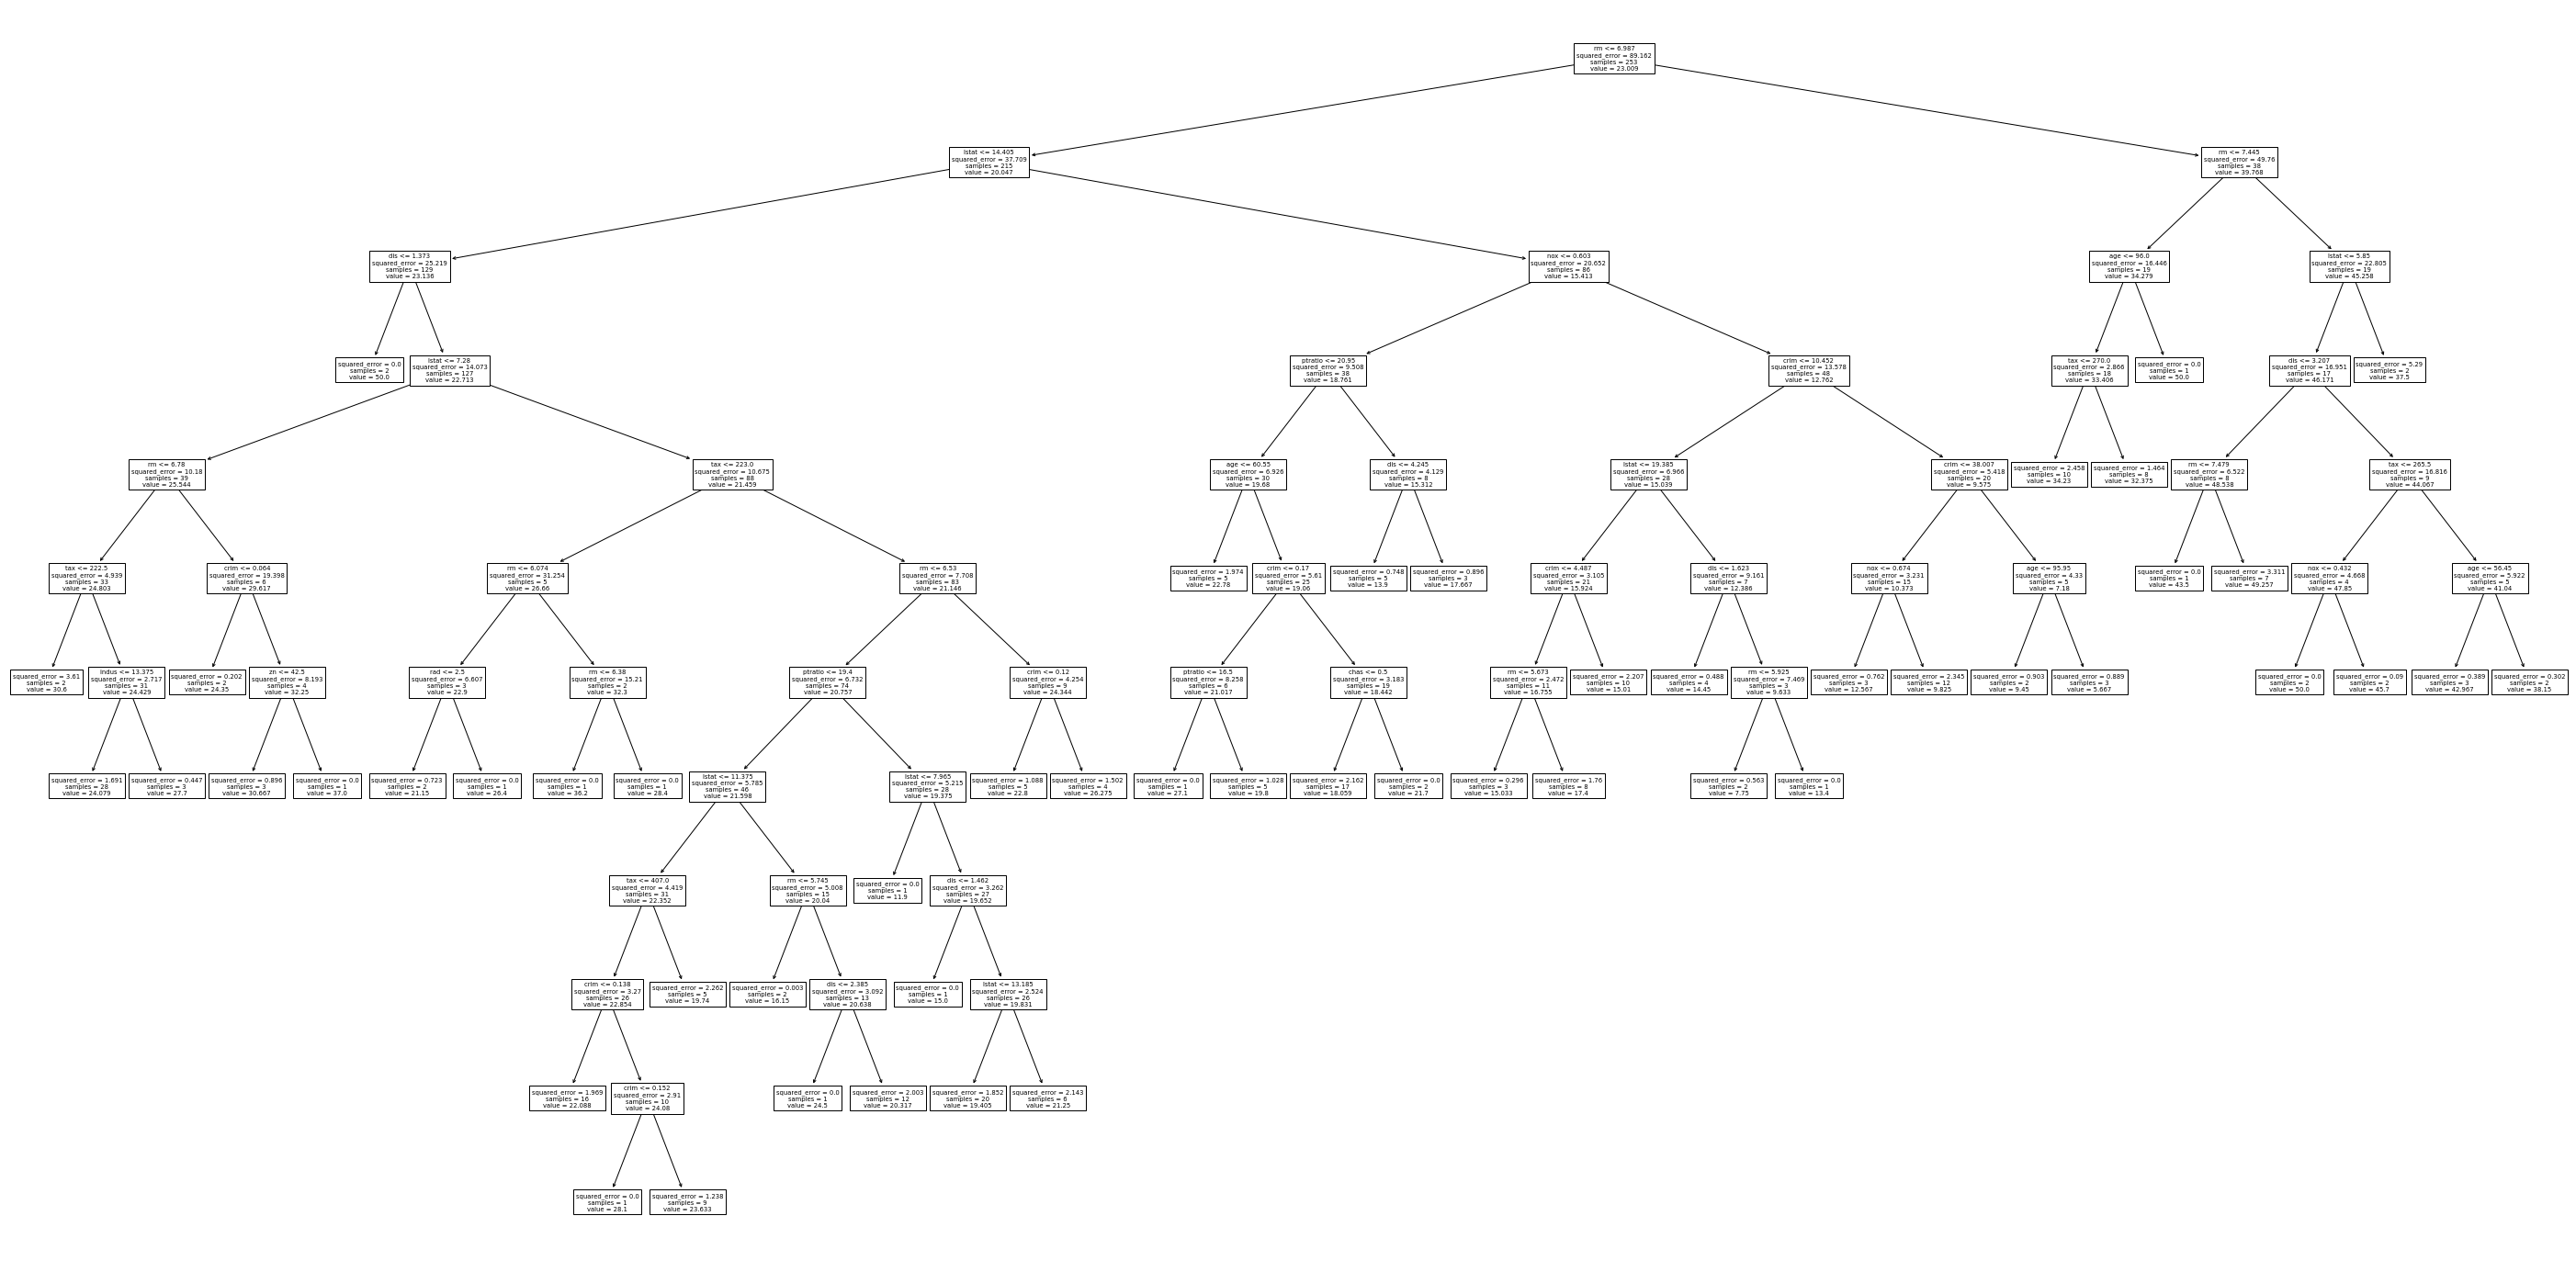

In [19]:
plt.figure(figsize=(50,25))
plot_tree(
  search.best_estimator_['model'],
  feature_names = features
  );
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

5.494681663393951

The final prediction RMSE on the test set is 5.49.

<Figure size 432x288 with 0 Axes>

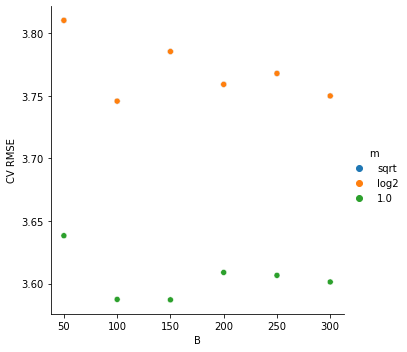

In [21]:
#random forest
from sklearn.ensemble import RandomForestRegressor

rf_mod =  RandomForestRegressor(
  # Number of trees
  n_estimators = 100, 
  criterion = 'squared_error',
  # Number of features to use in each split
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", rf_mod)
  ])

# Tune hyper-parameter(s)
B_grid = [50, 100, 150, 200, 250, 300]
m_grid = ['sqrt', 'log2', 1.0] # max_features = 1.0 uses all features
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }

from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

search.fit(X_other, y_other)

cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "rmse": -search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "rmse",
  hue = "m",
  ).set(
    xlabel = "B",
    ylabel = "CV RMSE"
);
plt.show()

In [23]:
-search.best_score_

3.5869488399045344

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

3.6551500159362367

The final prediction RMSE on the test set is 3.66.

<Figure size 432x288 with 0 Axes>

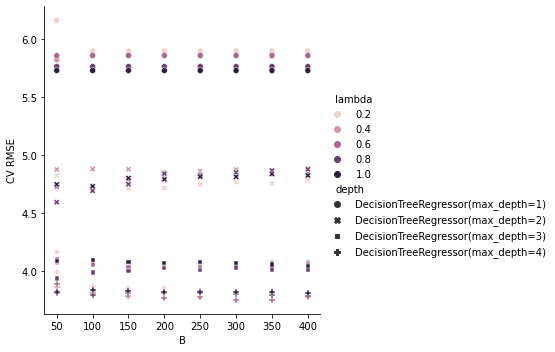

In [32]:
#boosting method
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

bst_mod =  AdaBoostRegressor(
  # Default base estimator is DecisionTreeRegressor with max_depth = 3
  base_estimator = DecisionTreeRegressor(max_depth = 3),
  # Number of trees (to be tuned)
  n_estimators = 50, 
  # Learning rate (to be tuned)
  learning_rate = 1.0,
  random_state = 425
  )

from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", bst_mod)
  ])
pipe

# Tune hyper-parameter(s)
d_grid = [
  DecisionTreeRegressor(max_depth = 1),
  DecisionTreeRegressor(max_depth = 2),
  DecisionTreeRegressor(max_depth = 3),
  DecisionTreeRegressor(max_depth = 4)
  ]
B_grid = [50, 100, 150, 200, 250, 300, 350, 400]
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }

from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

search.fit(X_other, y_other)

cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "rmse": -search.cv_results_["mean_test_score"],
  "lambda": search.cv_results_["param_model__learning_rate"],
  "depth": search.cv_results_["param_model__base_estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "rmse",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV RMSE"
);
plt.show()

In [33]:
-search.best_score_

3.7528494544591076

In [34]:
from sklearn.metrics import mean_squared_error

mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

3.573016453928059

The final prediction RMSE on the test set is 3.57. So the boosting method is better than random forest or regression tree.

### 5 ISL Lab 8.3 Carseats data set (30pts)

In [37]:
import pandas as pd
import io
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Carseats.csv"
s = requests.get(url).content
data2 = pd.read_csv(io.StringIO(s.decode('utf-8')))
data2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [38]:
data2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Figure size 432x288 with 0 Axes>

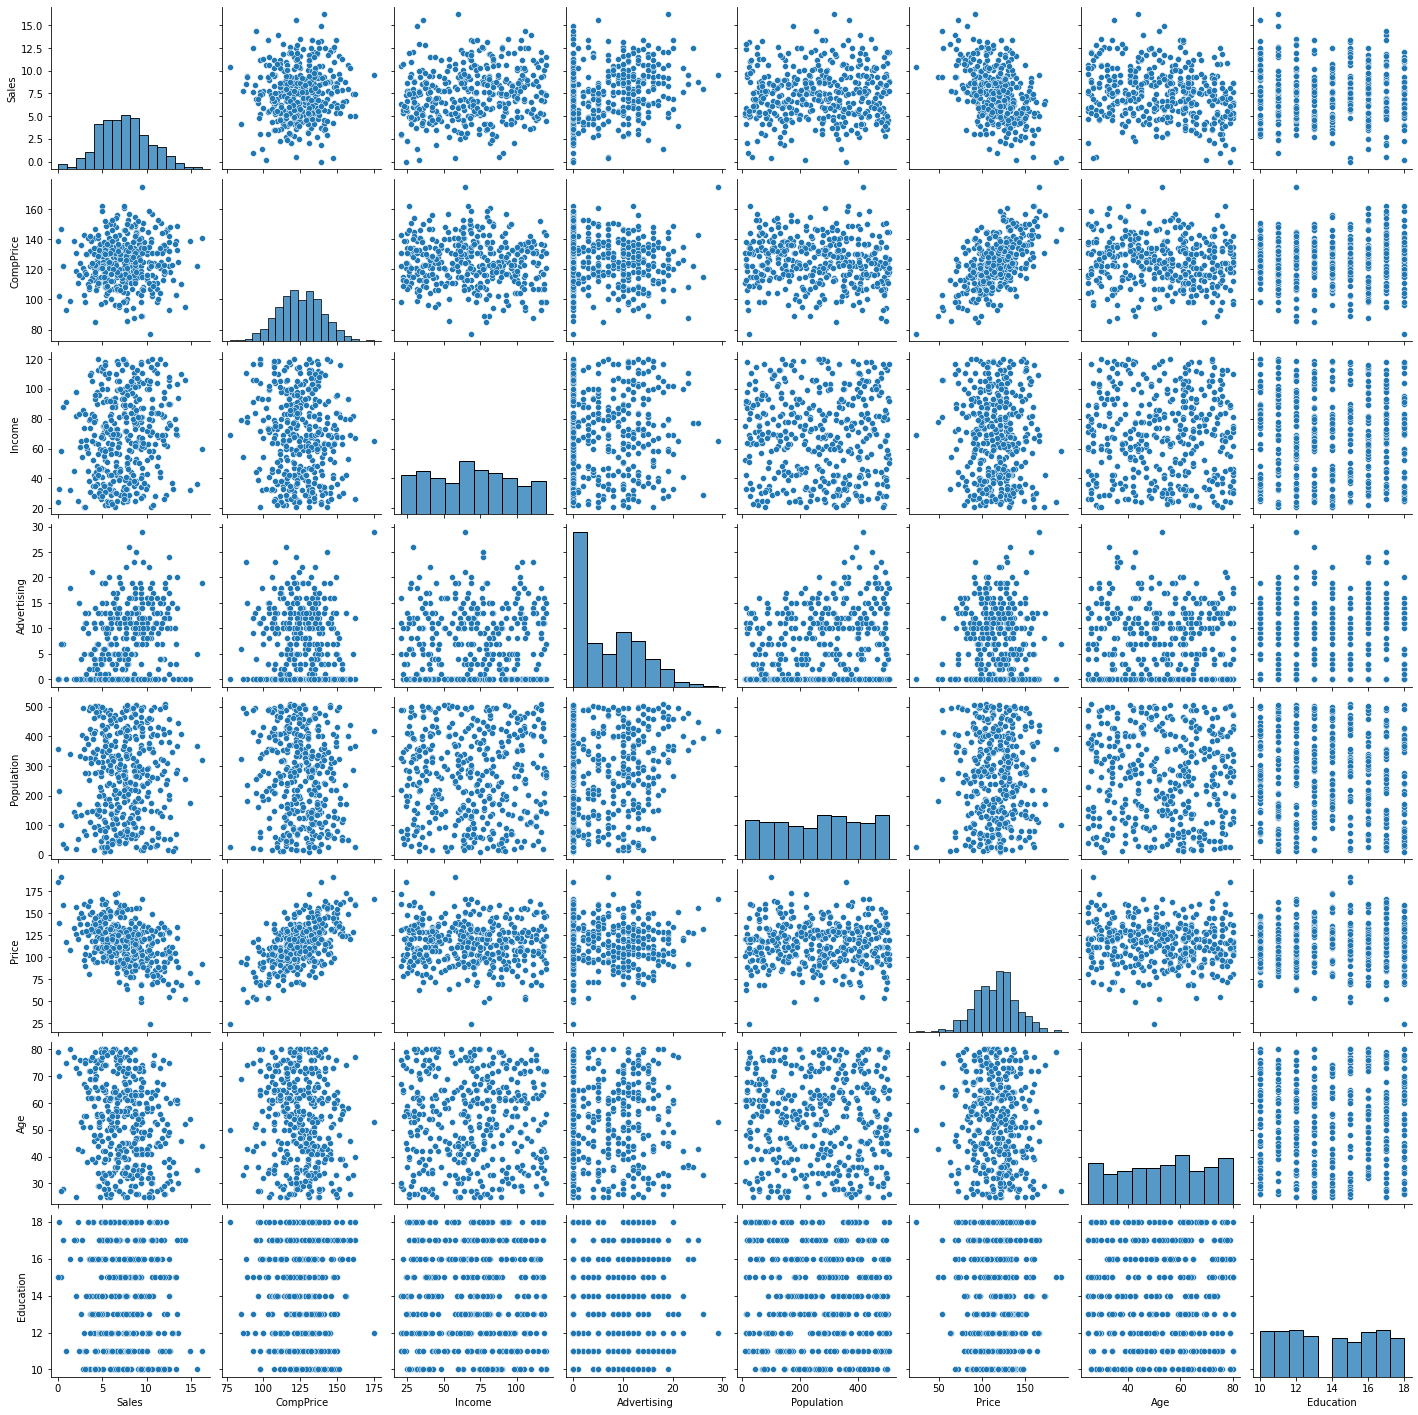

In [39]:
# Graphical summaries
plt.figure()
sns.pairplot(data = data2);
plt.show()

In [44]:
data2.loc[data2[data2.Sales <= 8].index.tolist(),'sales2'] = 0
data2.loc[data2[data2.Sales > 8].index.tolist(),'sales2'] = 1

In [46]:
from sklearn.model_selection import train_test_split

data2_other, data2_test = train_test_split(
  data2, 
  train_size = 0.75,
  random_state = 425, # seed
    stratify = data2.sales2
  )
data2_test.shape

(100, 12)

In [47]:
data2_other.shape

(300, 12)

In [48]:
num_features = ['CompPrice','Income','Advertising','Population','Price','Age','Education']
cat_features = ['Urban','US','ShelveLoc']
features = np.concatenate([num_features, cat_features])
# Non-test X and y
X_other = data2_other[features]
y_other = data2_other.sales2
# Test X and y
X_test = data2_test[features]
y_test = data2_test.sales2

In [49]:
data2.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales2         0
dtype: int64

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Transformer for categorical variables
categorical_tf = Pipeline(steps = [
  ("cat_impute", SimpleImputer(strategy = 'most_frequent')),
  ("encoder", OneHotEncoder())
])

# Transformer for continuous variables
numeric_tf = Pipeline(steps = [
  ("num_impute", SimpleImputer(strategy = 'mean')),
])

# Column transformer
col_tf = ColumnTransformer(transformers = [
  ('num', numeric_tf, num_features),
  ('cat', categorical_tf, cat_features)
])

<Figure size 432x288 with 0 Axes>

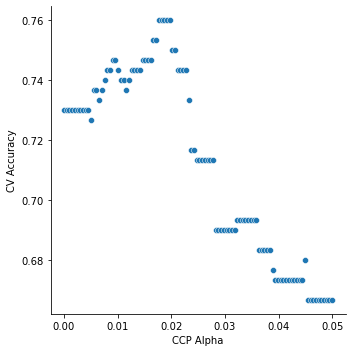

In [51]:
#classification tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

classtree_mod = DecisionTreeClassifier(
  criterion = 'gini',
  random_state = 425
  )

from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", classtree_mod)
  ])

# Tune hyper-parameter(s)
ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.05, num = 100)
tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }

from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "accuracy",
  # Refit the best model on the whole data set
  refit = True
  )

search.fit(X_other, y_other)

cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "acc": search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "ccp_alpha",
  y = "acc"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV Accuracy"
);
plt.show()

In [52]:
search.best_score_

0.76

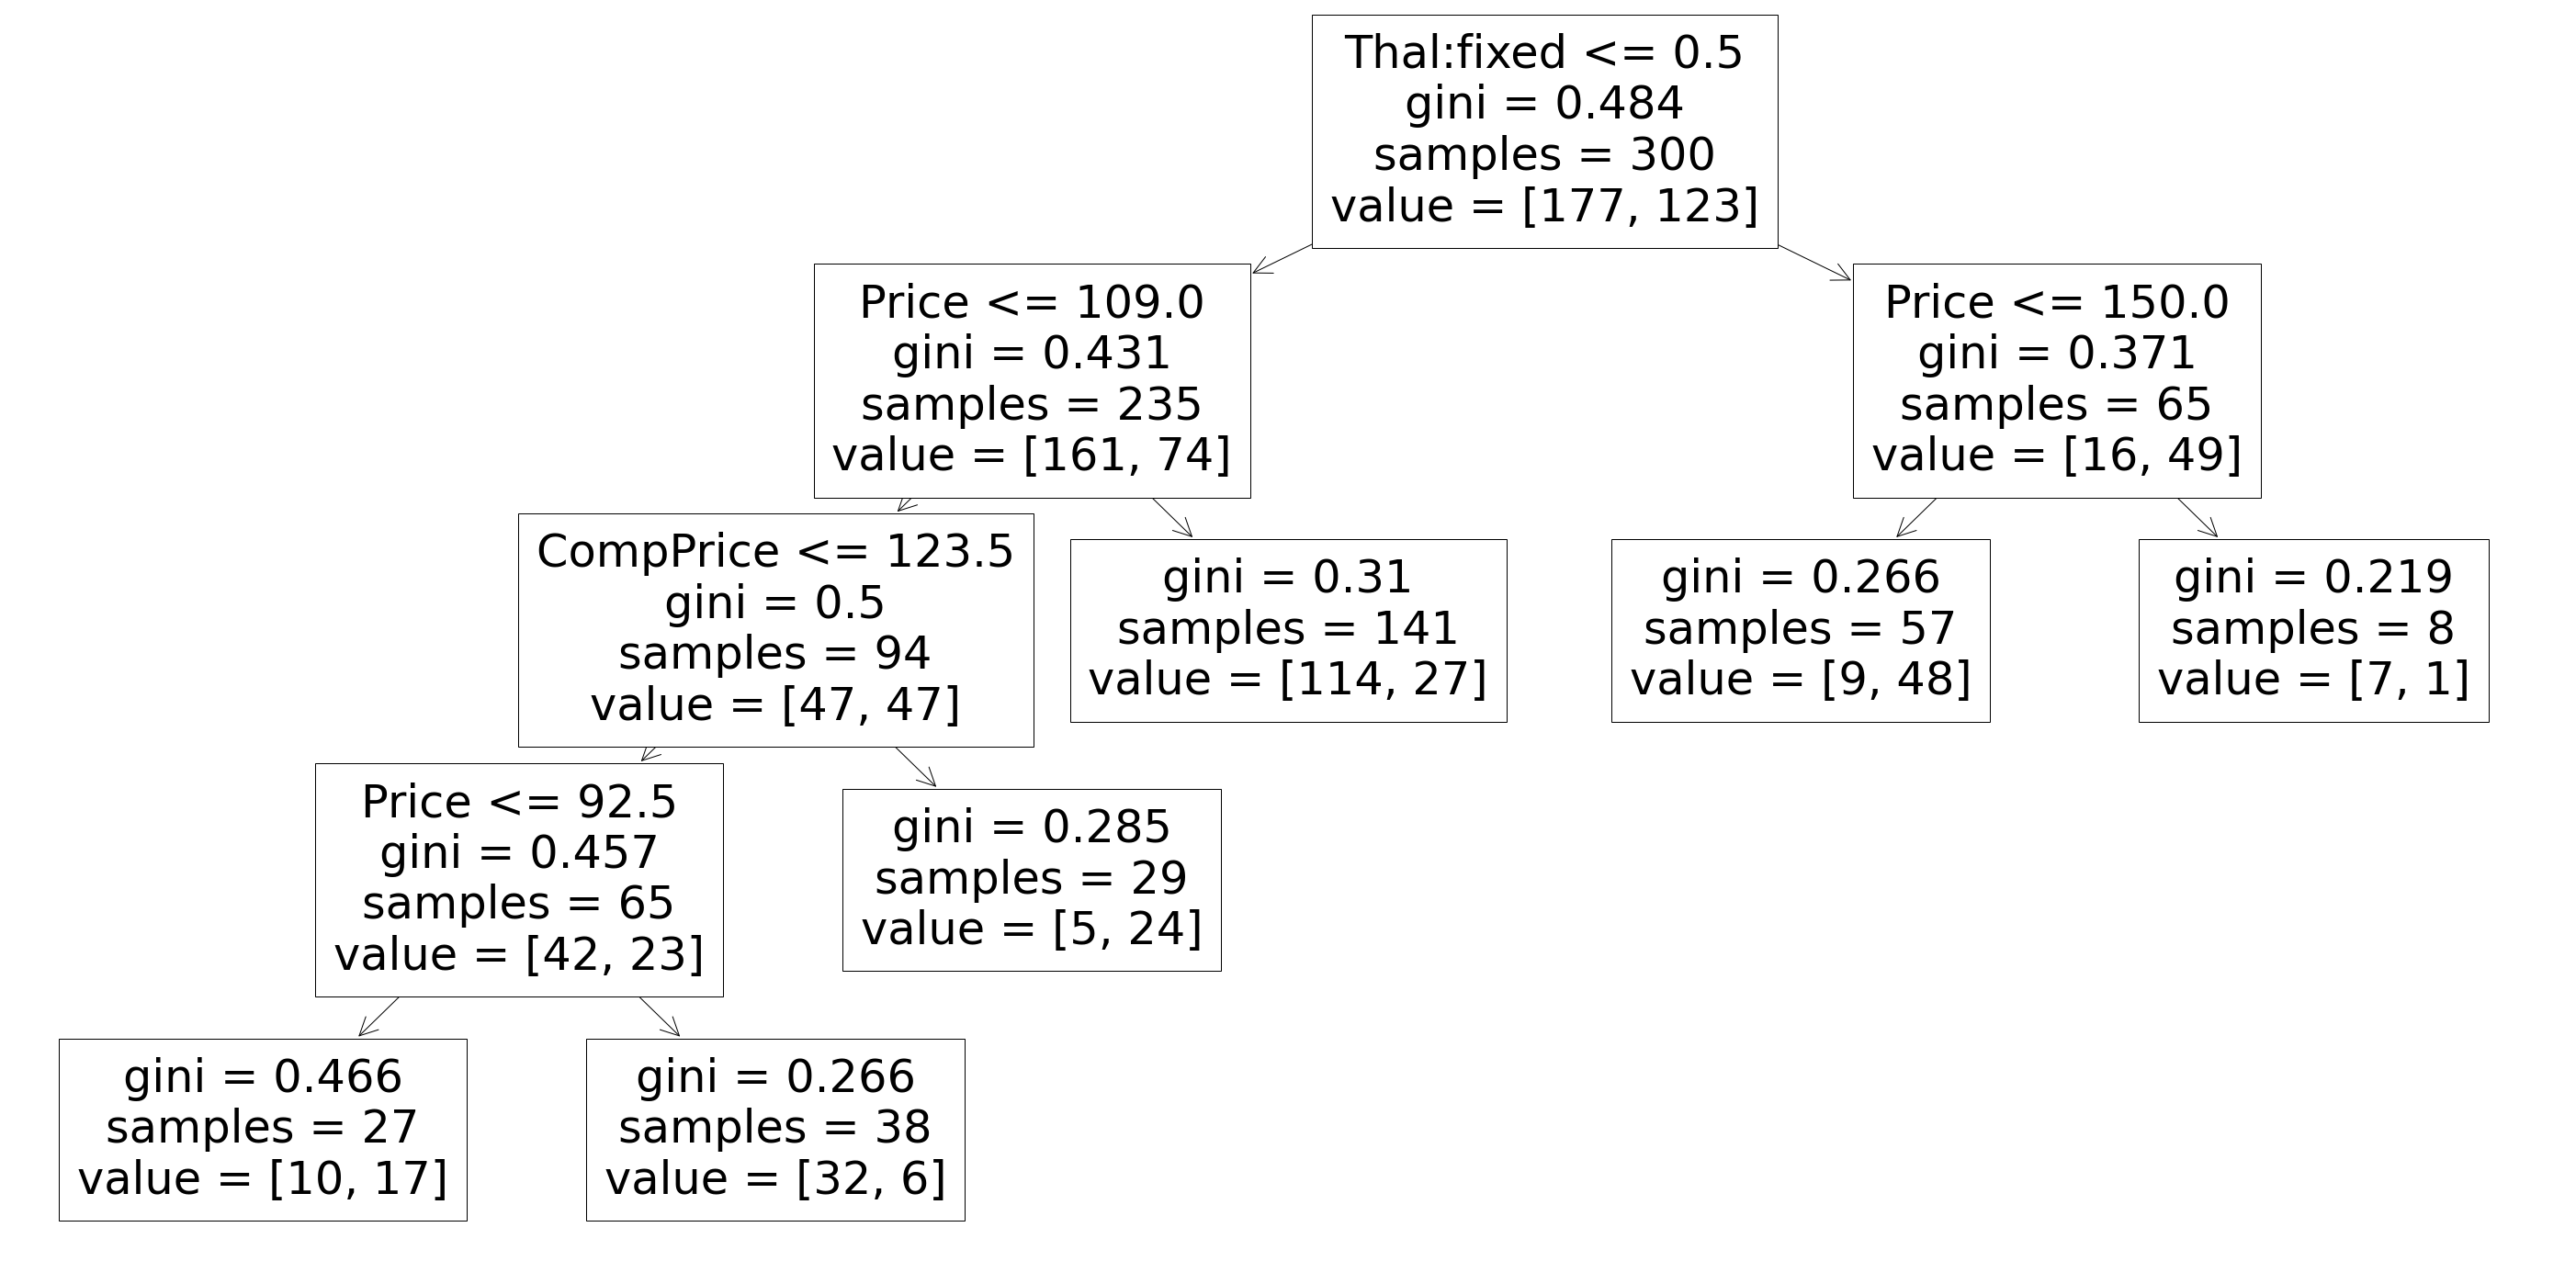

In [54]:
plt.figure(figsize=(50,25))
plot_tree(
  search.best_estimator_['model'],
  feature_names = np.concatenate([
    features[:-2], 
    ['ChestPain:asymptomatic', 'ChestPain:nonanginal', 'ChestPain:nontypical', 'ChestPain:typical'],
    ['Thal:fixed', 'Thal:normal', 'Thal:reversable']
    ])
  );
plt.show()

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(
  y_test, 
  search.best_estimator_.predict(X_test)
  )

0.77

The final classification accuracy on the test set is 0.77.

<Figure size 432x288 with 0 Axes>

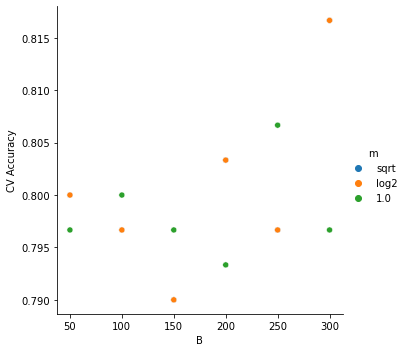

In [56]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_mod = RandomForestClassifier(
  # Number of trees
  n_estimators = 100, 
  criterion = 'gini',
  # Number of features to use in each split
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", rf_mod)
  ])

# Tune hyper-parameter(s)
B_grid = [50, 100, 150, 200, 250, 300]
m_grid = ['sqrt', 'log2', 1.0] # max_features = 1.0 uses all features
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "accuracy",
  # Refit the best model on the whole data set
  refit = True
  )

search.fit(X_other, y_other)

cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "acc": search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "acc",
  hue = "m"
  ).set(
    xlabel = "B",
    ylabel = "CV Accuracy"
);
plt.show()


In [57]:
search.best_score_

0.8166666666666668

In [58]:
from sklearn.metrics import accuracy_score

accuracy_score(
  y_test, 
  search.best_estimator_.predict(X_test)
  )

0.86

The final classification accuracy on the test set is 0.86.

<Figure size 432x288 with 0 Axes>

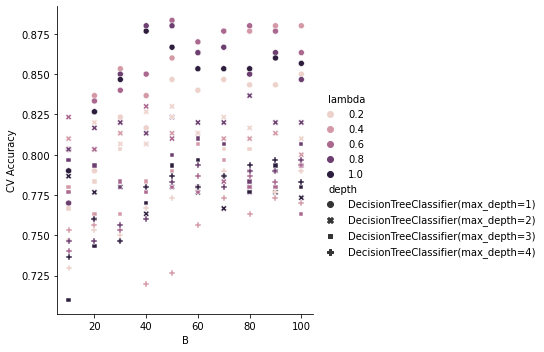

In [61]:
#boosting method

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bst_mod = AdaBoostClassifier(
  base_estimator = DecisionTreeClassifier(max_depth = 3),
  # Number of trees (to be tuned)
  n_estimators = 50, 
  # Learning rate (to be tuned)
  learning_rate = 1.0,
  random_state = 425
  )

from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", bst_mod)
  ])

d_grid = [
  DecisionTreeClassifier(max_depth = 1),
  DecisionTreeClassifier(max_depth = 2),
  DecisionTreeClassifier(max_depth = 3),
  DecisionTreeClassifier(max_depth = 4)
  ]
B_grid = np.linspace(10, 100, 10).astype(int)
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "accuracy",
  # Refit the best model on the whole data set
  refit = True
  )

search.fit(X_other, y_other)

cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "acc": search.cv_results_["mean_test_score"],
  "lambda": search.cv_results_["param_model__learning_rate"],
  "depth": search.cv_results_["param_model__base_estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "acc",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV Accuracy"
);
plt.show()

In [62]:
search.best_score_

0.8833333333333334

In [63]:
from sklearn.metrics import accuracy_score

accuracy_score(
  y_test,
  search.best_estimator_.predict(X_test)
  )

0.89

The final classification accuracy on the test set is 0.89. So the boosting method is better than random forest or classification tree.